In [1]:
import os

# Define the target directory
target_directory = r"C:\Users\pablosal\Desktop\gbb-ai-hls-factory-prior-auth"  # change your directory here

# Check if the directory exists
if os.path.exists(target_directory):
    # Change the current working directory
    os.chdir(target_directory)
    print(f"Directory changed to {os.getcwd()}")
else:
    print(f"Directory {target_directory} does not exist.")

Directory changed to C:\Users\pablosal\Desktop\gbb-ai-hls-factory-prior-auth


In [2]:
from src.pipeline.paprocessing.run import PAProcessingPipeline

In [3]:
from src.pipeline.paprocessing.prompt_manager import PromptManager
from src.pipeline.paprocessing.run import PAProcessingPipeline
pa_pipeline = PAProcessingPipeline()

2024-10-30 17:45:20,334 - micro - MainProcess - INFO     Container 'pre-auth-policies' already exists. (blob_helper.py:_create_container_if_not_exists:73)
C:\Users\pablosal\Desktop\gbb-ai-hls-factory-prior-auth\src\cosmosdb\cosmosmongodb_helper.py:27: UserWarning: You appear to be connected to a CosmosDB cluster. For more information regarding feature compatibility and support please visit https://www.mongodb.com/supportability/cosmosdb
  self.client = pymongo.MongoClient(connection_string)


Template directory resolved to: C:\Users\pablosal\Desktop\gbb-ai-hls-factory-prior-auth\src\pipeline\paprocessing\templates
Templates found: ['ner_system_prompt.jinja', 'ner_user_prompt.jinja', 'prior_auth_system_prompt.jinja', 'prior_auth_user_prompt.jinja', 'query_expansion_system_prompt.jinja', 'query_expansion_user_prompt.jinja']


In [4]:
pipeline = PAProcessingPipeline()

2024-10-30 17:45:21,932 - micro - MainProcess - INFO     Container 'pre-auth-policies' already exists. (blob_helper.py:_create_container_if_not_exists:73)


Template directory resolved to: C:\Users\pablosal\Desktop\gbb-ai-hls-factory-prior-auth\src\pipeline\paprocessing\templates
Templates found: ['ner_system_prompt.jinja', 'ner_user_prompt.jinja', 'prior_auth_system_prompt.jinja', 'prior_auth_user_prompt.jinja', 'query_expansion_system_prompt.jinja', 'query_expansion_user_prompt.jinja']


In [5]:
uploaded_files = r"C:\Users\pablosal\Desktop\gbb-ai-hls-factory-prior-auth\utils\data\cases\002\b"
from src.pipeline.paprocessing.helpers import find_all_files
files = find_all_files(uploaded_files, ["pdf"])

2024-10-30 17:45:22,540 - micro - MainProcess - INFO     Found 4 files with extensions ['pdf'] (helpers.py:find_all_files:32)


In [6]:
await pipeline.run(uploaded_files=files)

2024-10-30 17:45:22,775 - micro - MainProcess - INFO     File 'C:\Users\pablosal\Desktop\gbb-ai-hls-factory-prior-auth\utils\data\cases\002\b\doctor_notes\002_b (note).pdf' uploaded to blob 'pa_proccesing_runs/8b4b8955/raw_uploaded_files/002_b (note).pdf' successfully. (blob_helper.py:_upload_single_file:175)
2024-10-30 17:45:22,776 - micro - MainProcess - INFO     Uploaded file 'C:\Users\pablosal\Desktop\gbb-ai-hls-factory-prior-auth\utils\data\cases\002\b\doctor_notes\002_b (note).pdf' to blob 'https://storageaeastusfactory.blob.core.windows.net/pre-auth-policies/pa_proccesing_runs/8b4b8955/raw_uploaded_files/002_b (note).pdf' in container 'pre-auth-policies'. (run.py:upload_files_to_blob:206)
2024-10-30 17:45:22,838 - micro - MainProcess - INFO     File 'C:\Users\pablosal\Desktop\gbb-ai-hls-factory-prior-auth\utils\data\cases\002\b\imaging\002_b (imaging).pdf' uploaded to blob 'pa_proccesing_runs/8b4b8955/raw_uploaded_files/002_b (imaging).pdf' successfully. (blob_helper.py:_upload_

[[{'role': 'system',
   'content': '## Role:\nYou are an expert Prior Authorization (PA) specialist with extensive experience in analyzing medical documents and extracting critical information.\n\n## Task:\nYour task is to review and interpret medical documents provided as images, such as prior authorization forms, medical imaging results, lab reports, and doctor notes. Your goal is to extract essential information to make informed decisions regarding Prior Authorization (PA) workflows. You are proficient in handling images from PDFs and ensuring the accuracy and completeness of the extracted data.\n\n## Instructions:\nCarefully analyze the provided images and extract the following information, presenting it in **JSON format** as key-value pairs:\n\n1. **Diagnosis and Medical Justification** (including ICD-10 code)\n2. **Detailed History of Alternative Treatments and Results**\n3. **Relevant Lab Results or Diagnostic Imaging**\n4. **Documented Symptom Severity and Impact on Daily Life*
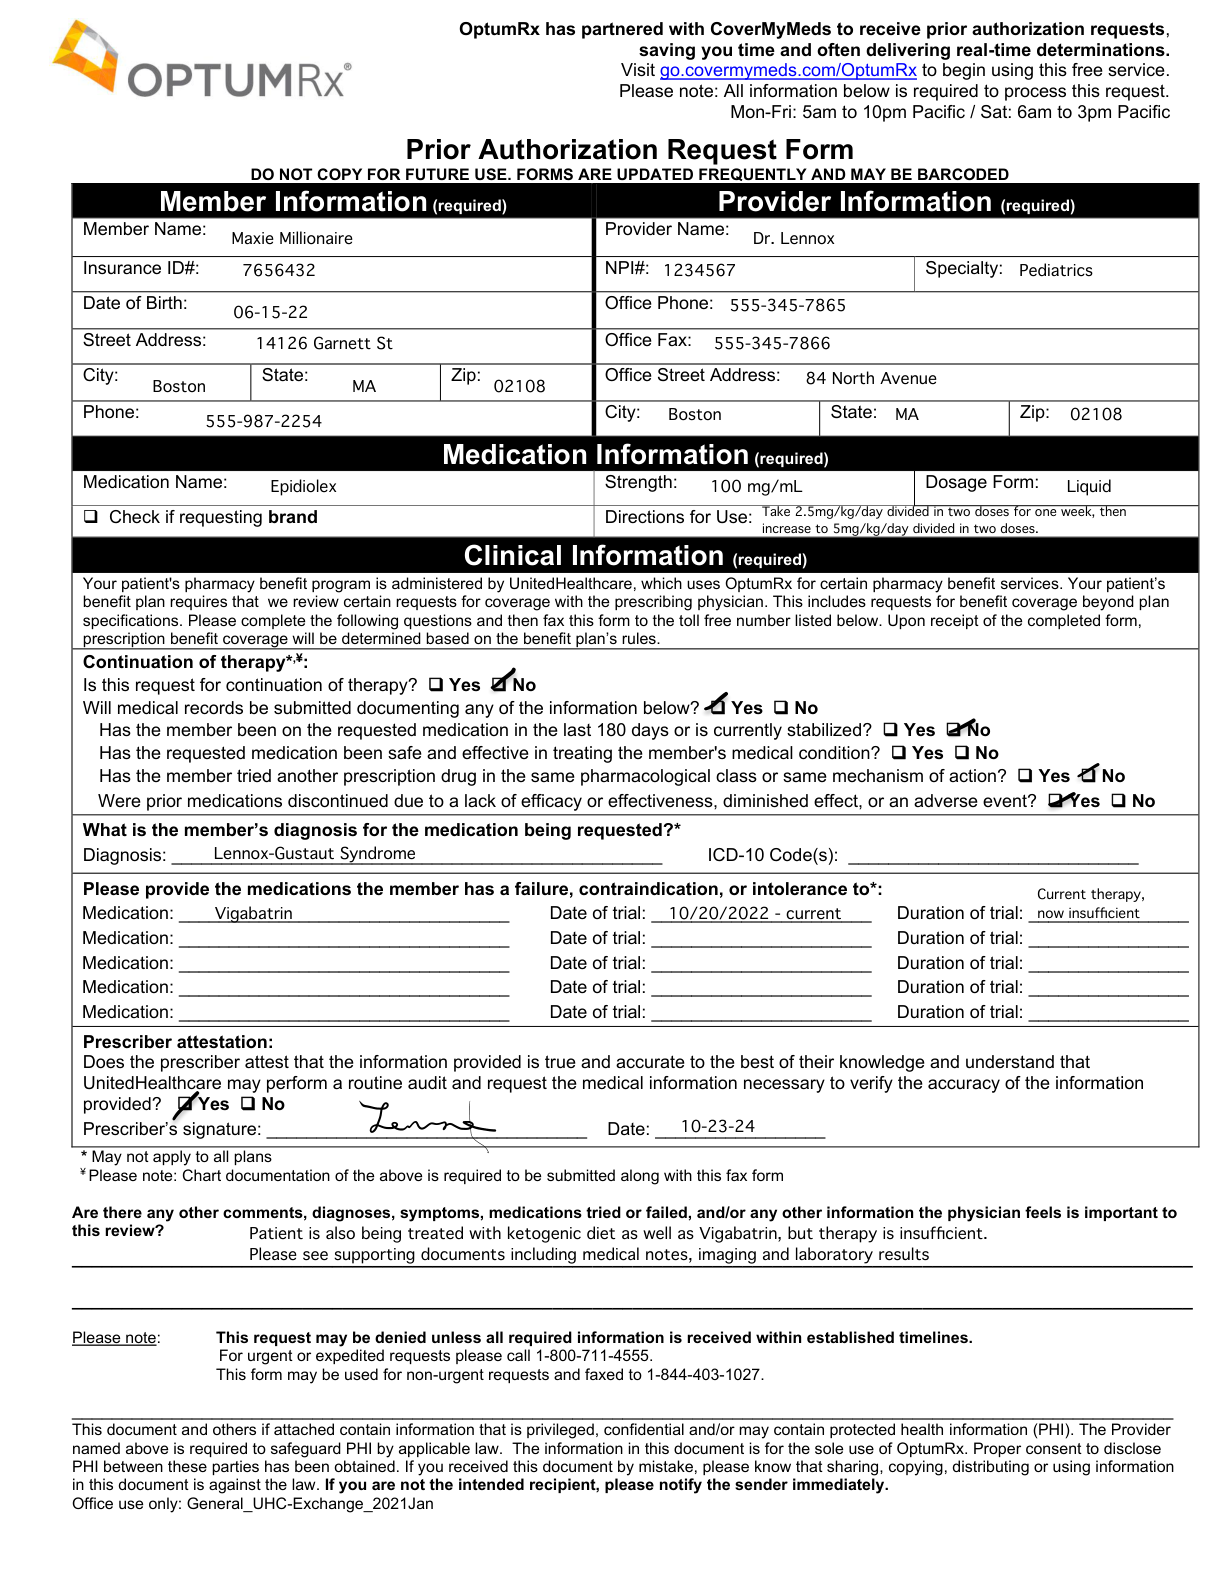
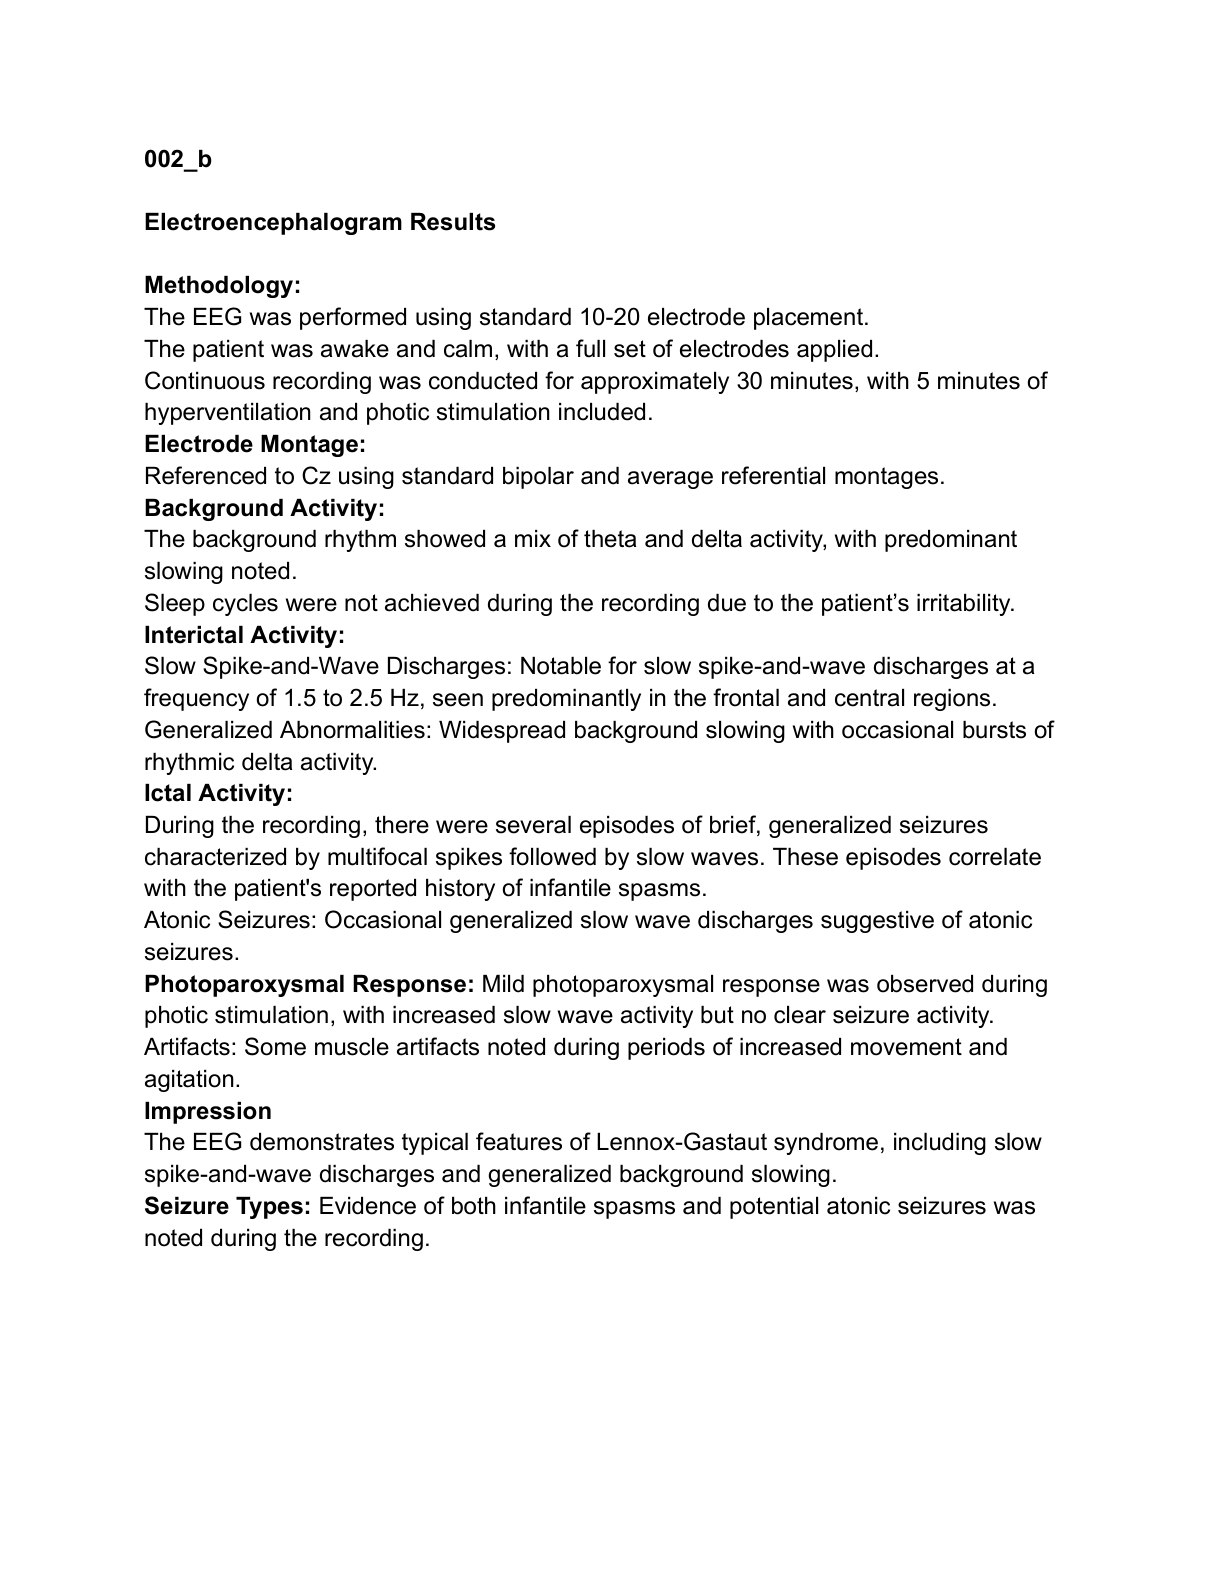
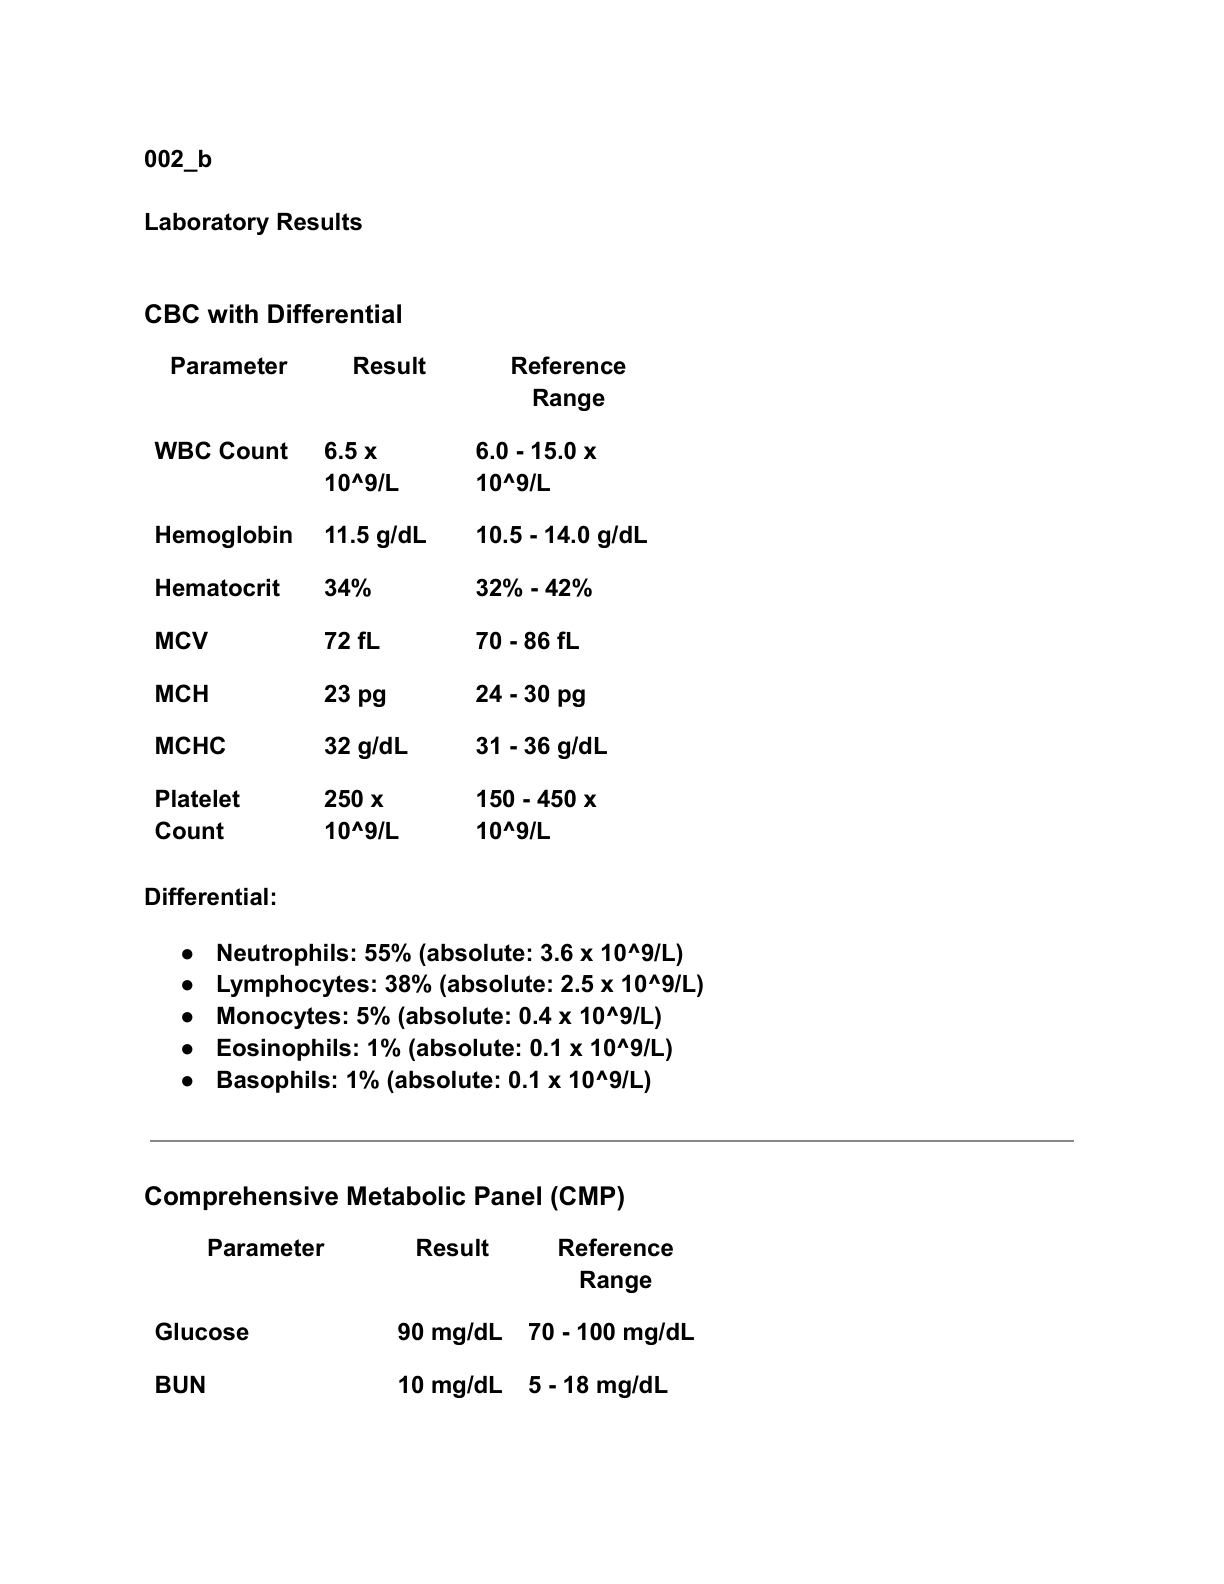
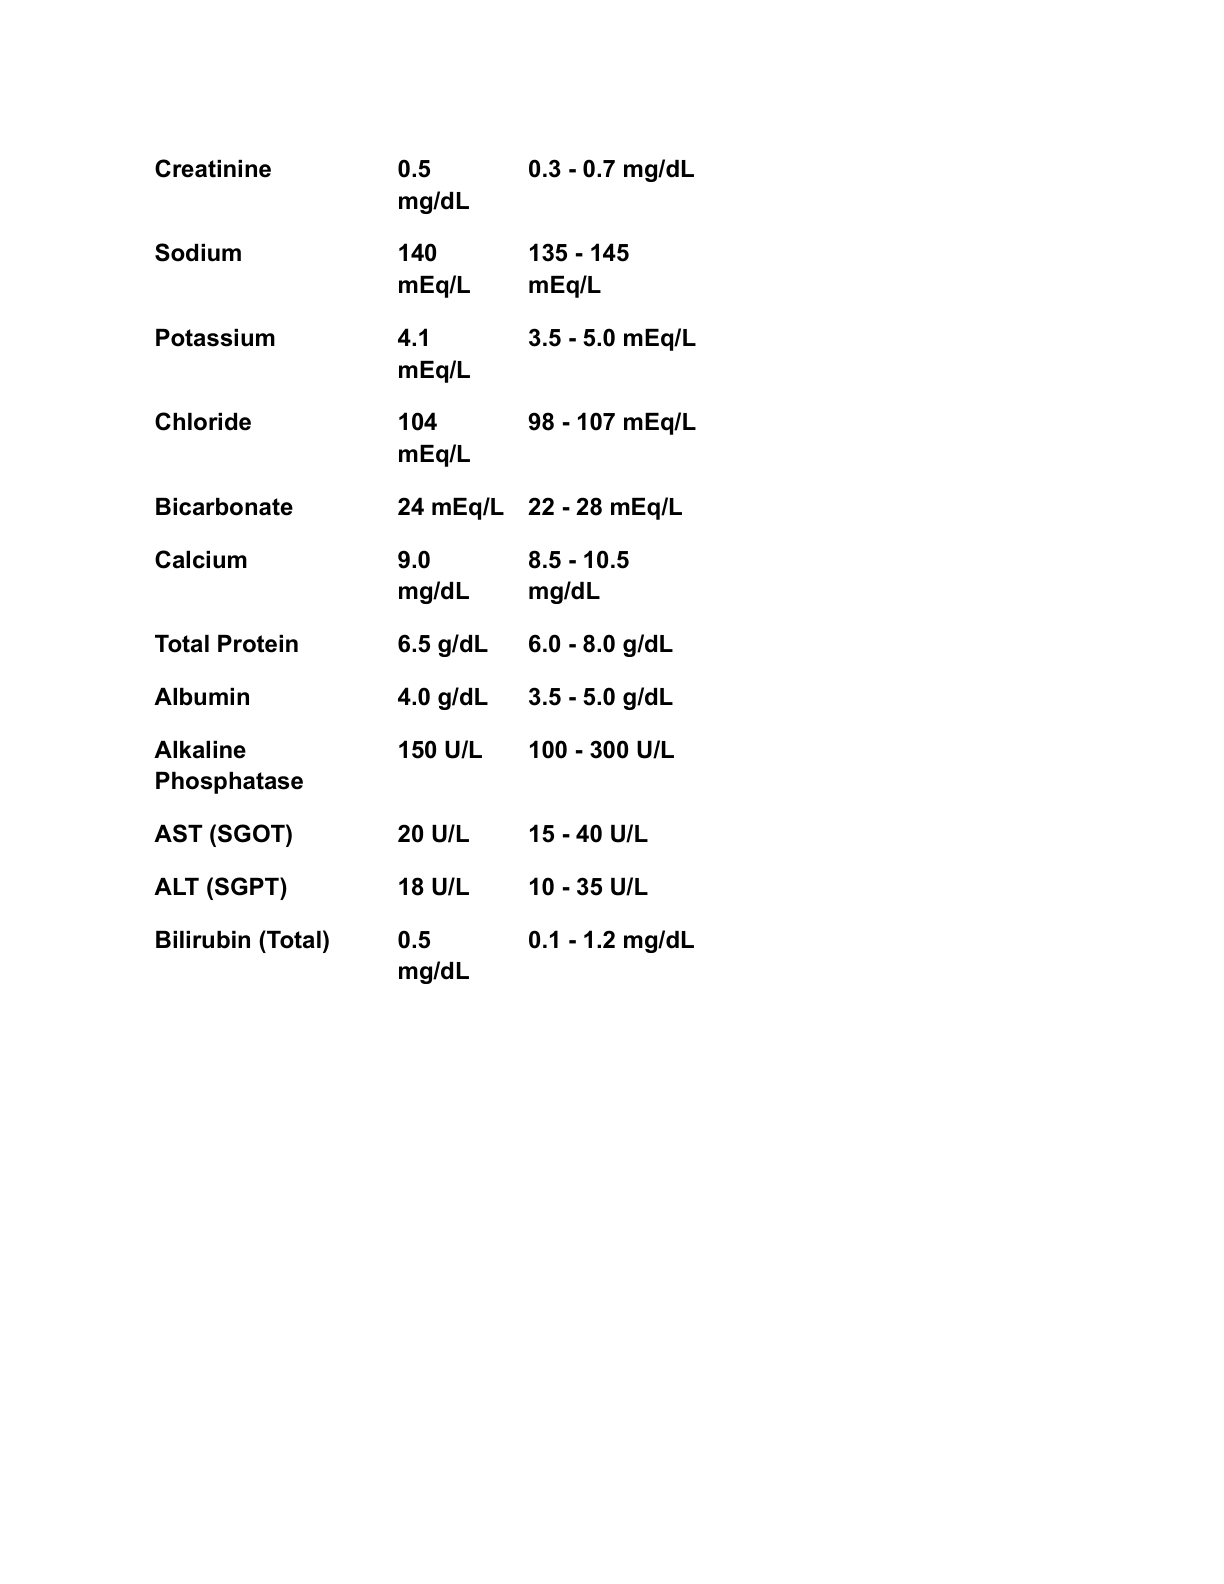
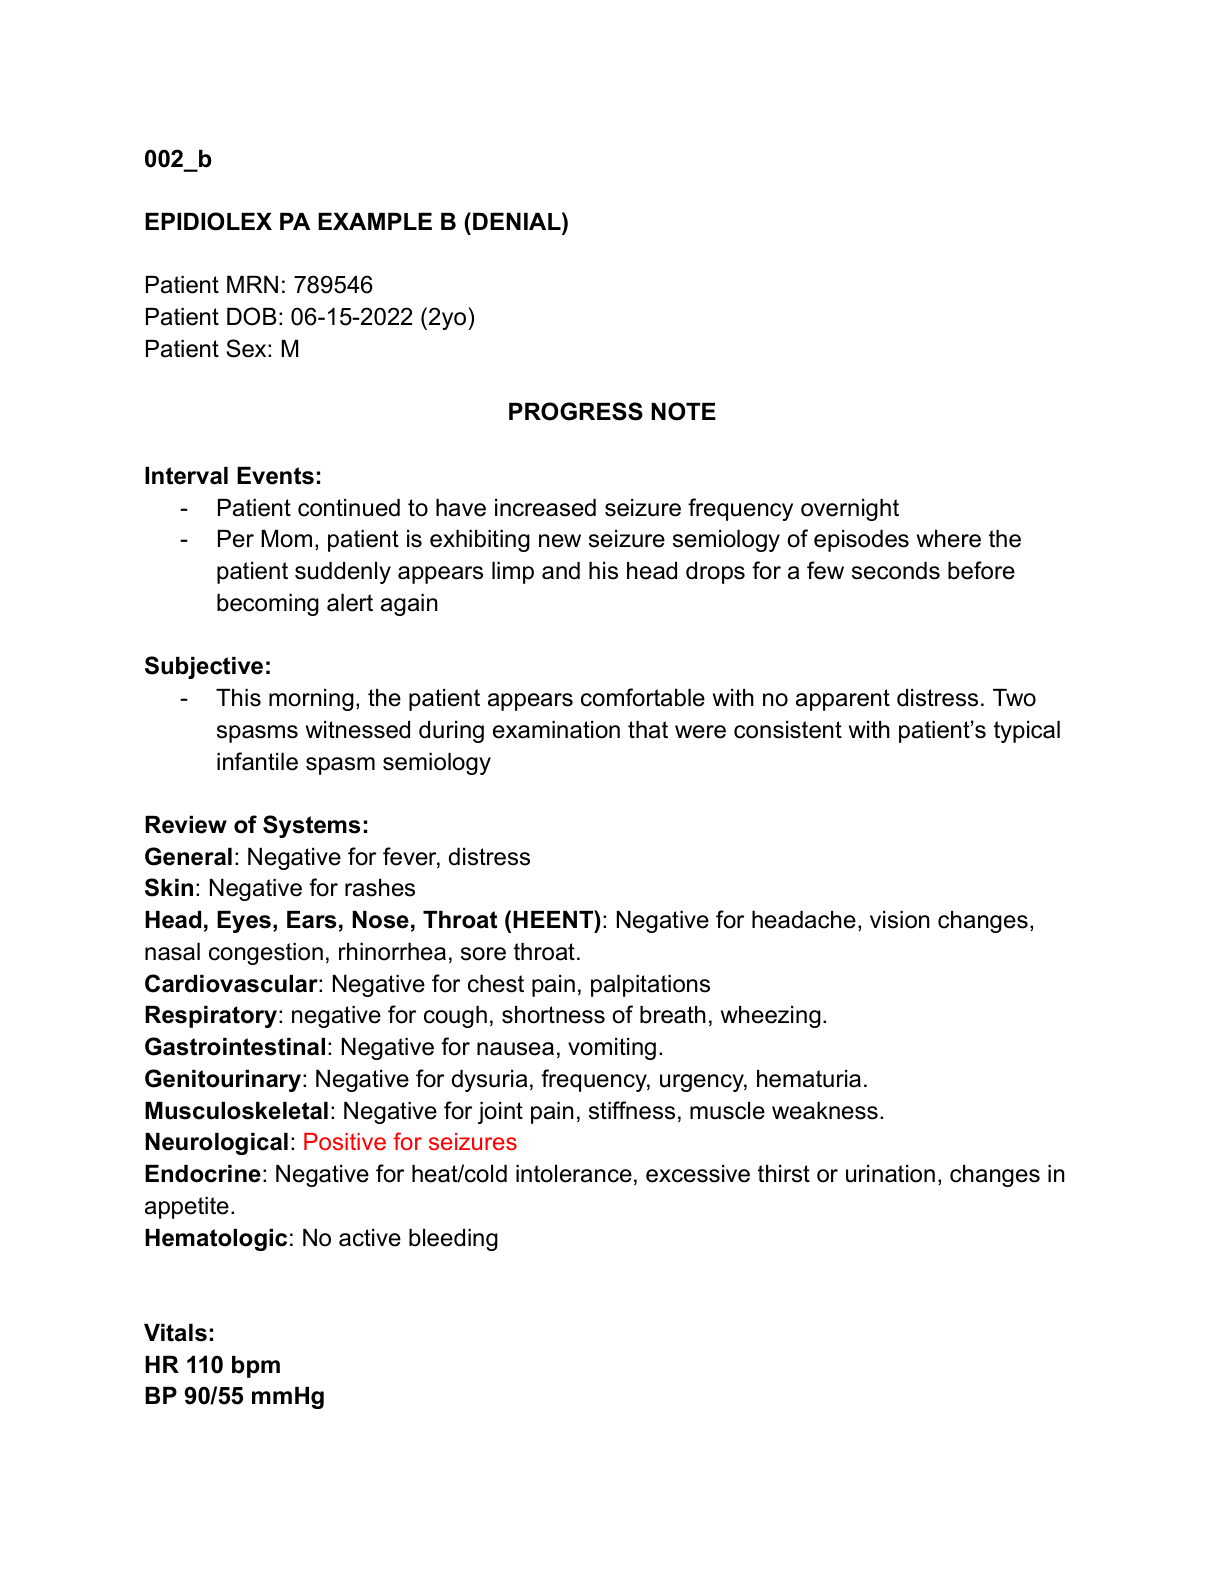
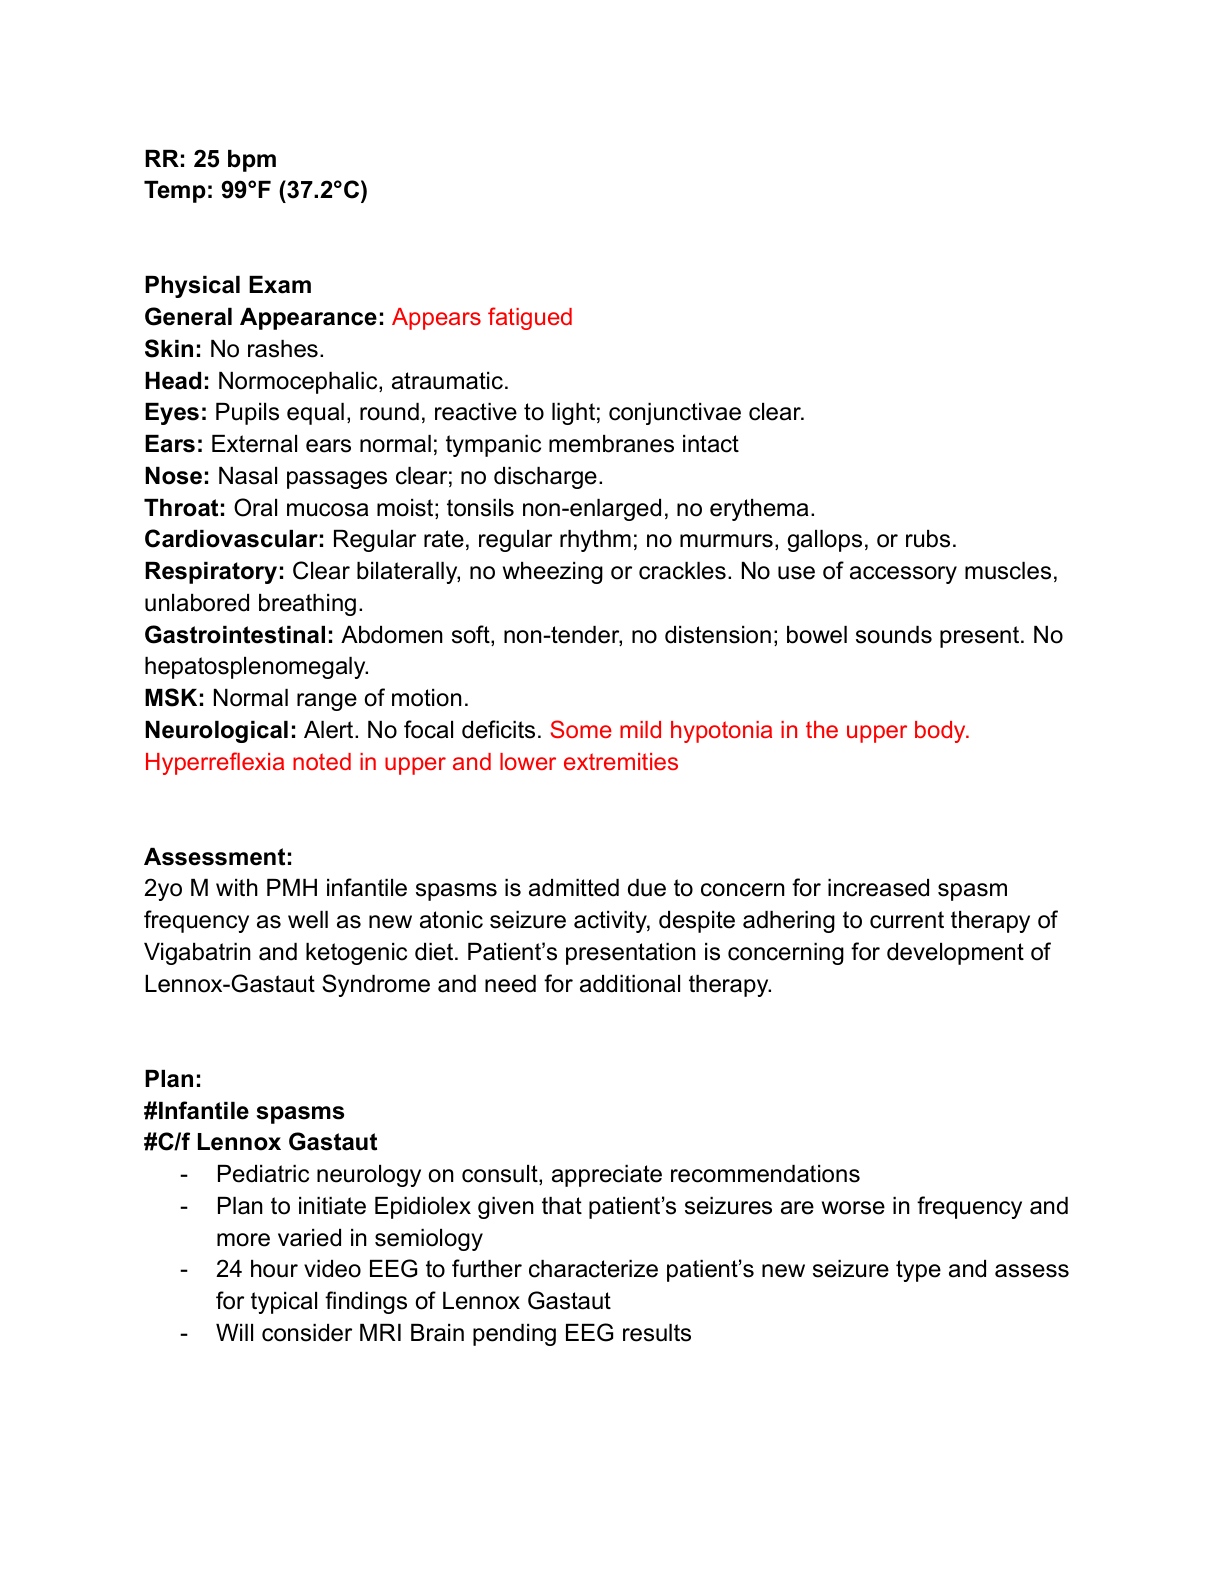

In [18]:
pipeline.conversation_history

In [7]:
pipeline.results

{'8b4b8955': {'raw_uploaded_files': ['https://storageaeastusfactory.blob.core.windows.net/pre-auth-policies/pa_proccesing_runs/8b4b8955/raw_uploaded_files/002_b (note).pdf',
   'https://storageaeastusfactory.blob.core.windows.net/pre-auth-policies/pa_proccesing_runs/8b4b8955/raw_uploaded_files/002_b (imaging).pdf',
   'https://storageaeastusfactory.blob.core.windows.net/pre-auth-policies/pa_proccesing_runs/8b4b8955/raw_uploaded_files/002_b (labs).pdf',
   'https://storageaeastusfactory.blob.core.windows.net/pre-auth-policies/pa_proccesing_runs/8b4b8955/raw_uploaded_files/002_b (form).pdf'],
  'processed_images': ['https://storageaeastusfactory.blob.core.windows.net/pre-auth-policies/pa_proccesing_runs/8b4b8955/processed_images/002_b (form)-page-1.png'],
  'Patient Information': {'Patient Name': 'Maxie Millionaire',
   'Patient Date of Birth': '06-15-22',
   'Patient ID': '7656432',
   'Patient Address': '14126 Garnett St, Boston, MA, 02108',
   'Patient Phone Number': '555-987-2254'},


In [8]:
last_key = next(reversed(pipeline.results.keys()))
last_key

'8b4b8955'

In [9]:
from src.cosmosdb.cosmosmongodb_helper import CosmosDBMongoCoreManager
cosmosdbManager = CosmosDBMongoCoreManager(database_name="pa_proccesing",
                                           collection_name="cases")

In [10]:
query = {"caseId": "efb1ce31"}

# Fetch the document based on the caseId
document = cosmosdbManager.read_document(query)

In [11]:
document['Patient Information']

{'Patient Name': 'Sarah Sample',
 'Patient Date of Birth': '10-19-2014',
 'Patient ID': '4567890',
 'Patient Address': '25 W Randolph St, Chicago, IL 60601',
 'Patient Phone Number': '555-123-4567'}

In [11]:
document

{'_id': ObjectId('672194a55a64bad97e2ae561'),
 'caseId': 'efb1ce31',
 'raw_uploaded_files': ['https://storageaeastusfactory.blob.core.windows.net/pre-auth-policies/pa_proccesing_runs/efb1ce31/raw_uploaded_files/01_a_notes.pdf',
  'https://storageaeastusfactory.blob.core.windows.net/pre-auth-policies/pa_proccesing_runs/efb1ce31/raw_uploaded_files/01_a_imaging.pdf',
  'https://storageaeastusfactory.blob.core.windows.net/pre-auth-policies/pa_proccesing_runs/efb1ce31/raw_uploaded_files/01_a_labs.pdf',
  'https://storageaeastusfactory.blob.core.windows.net/pre-auth-policies/pa_proccesing_runs/efb1ce31/raw_uploaded_files/01_a_form.pdf'],
 'processed_images': ['https://storageaeastusfactory.blob.core.windows.net/pre-auth-policies/pa_proccesing_runs/efb1ce31/processed_images/01_a_form-page-1.png',
  'https://storageaeastusfactory.blob.core.windows.net/pre-auth-policies/pa_proccesing_runs/efb1ce31/processed_images/01_a_form-page-2.png'],
 'Patient Information': {'Patient Name': 'Sarah Sample',


In [12]:
document['Clinical Information']
document['policy_location']
document['raw_uploaded_files']
document['policy_location']


'https://storageaeastusfactory.blob.core.windows.net/pre-auth-policies/policies_ocr/001_inflammatory_Conditions.pdf'